# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

In [2]:
digits.target_names


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
print(X)
print(X.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  1. 10. ... 10.  9.  0.]
 [ 0.  0. 15. ...  6.  2.  0.]
 [ 0.  0.  6. ...  6.  0.  0.]]
(537, 64)


載入 相關套件 並 執行 PCA 實驗 ...

In [4]:
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

In [5]:
pca.fit(X)
X = pca.transform(X)
print(X)
print(X.shape)

[[ 28.47993992  -3.43359359   1.03184835]
 [-22.59666568  17.80122274   6.11085609]
 [ -8.83188035  11.46680509   2.01624684]
 ...
 [-22.05029473 -16.58404599  -5.73396933]
 [-16.44102253 -17.48311967  -3.95362923]
 [ 28.5723742    1.03814293   5.45381184]]
(537, 3)


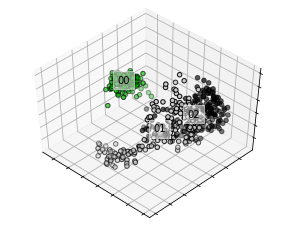

In [6]:


fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('00', 0), ('01', 1), ('02', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()